<a href="https://colab.research.google.com/github/SHsix/Embedded_System/blob/master/Python_%EA%B8%B0%EC%B4%88/lec04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files

In [4]:
upload = files.upload()

Saving lec04_test0.png to lec04_test0.png


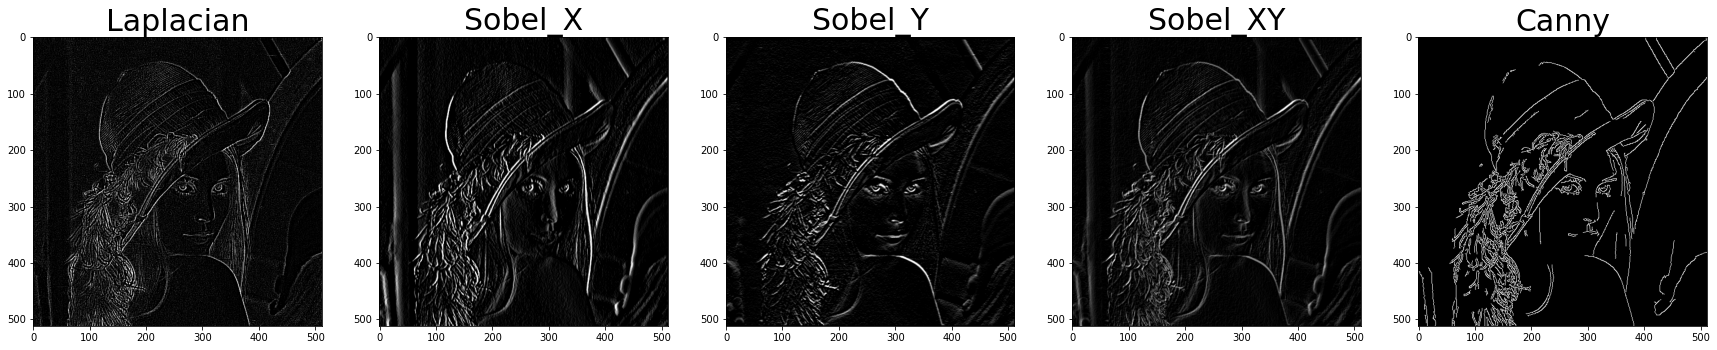

In [26]:
img = cv2.imread('lec04_test0.png')
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

laplacian = cv2.Laplacian(img, cv2.CV_8U, ksize = 3)
sobel_x = cv2.Sobel(img, cv2.CV_8U, 1, 0, ksize=3)
sobel_y = cv2.Sobel(img, cv2.CV_8U, 0, 1, ksize=3)
sobel_xy = cv2.addWeighted(sobel_x, 0.5, sobel_y, 0.5, 0)
canny = cv2.Canny(img, 100, 255)

plt.figure(figsize=(30,30))
plt.subplot(1, 5, 1), plt.title('Laplacian', fontsize=30), plt.imshow(cv2.cvtColor(laplacian, cv2.COLOR_GRAY2RGB))
plt.subplot(1, 5, 2), plt.title('Sobel_X', fontsize=30), plt.imshow(cv2.cvtColor(sobel_x, cv2.COLOR_GRAY2RGB))
plt.subplot(1, 5, 3), plt.title('Sobel_Y', fontsize=30), plt.imshow(cv2.cvtColor(sobel_y, cv2.COLOR_GRAY2RGB))
plt.subplot(1, 5, 4), plt.title('Sobel_XY', fontsize=30), plt.imshow(cv2.cvtColor(sobel_xy, cv2.COLOR_GRAY2RGB))
plt.subplot(1, 5, 5), plt.title('Canny', fontsize=30), plt.imshow(cv2.cvtColor(canny, cv2.COLOR_GRAY2RGB))
plt.show()

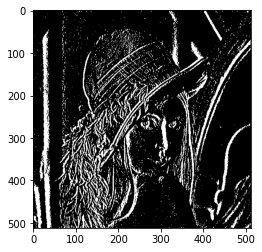

In [36]:
ret, test = cv2.threshold(sobel_x, 30, 255, cv2.THRESH_BINARY)
plt.imshow(cv2.cvtColor(test, cv2.COLOR_GRAY2RGB))
plt.show()

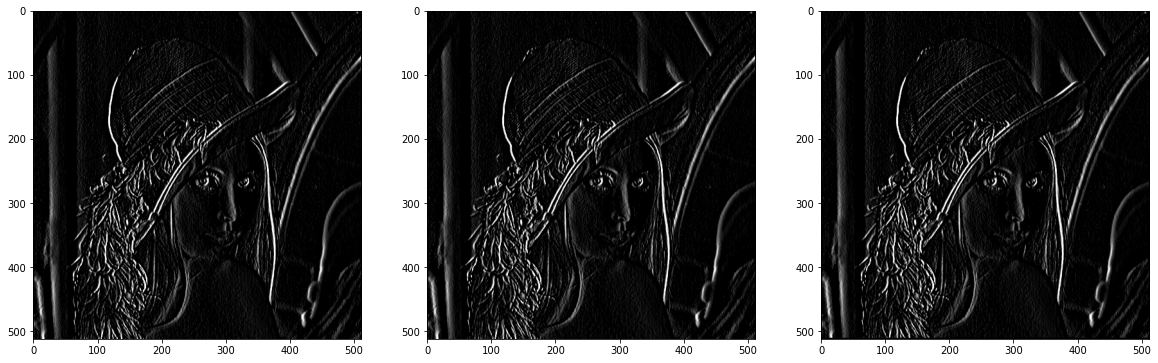

In [41]:
# 커널을 만들고 직접 컨볼루션
kernel_x = np.array([[-1, 0, 1],
                     [-2, 0, 2],
                     [-1, 0, 1]])
height, width = img.shape[:2]
s_x = np.zeros_like(img)
for j in range(1, height - 2):
  for i in range(1, width - 2):
    score_x = np.sum(img[j-1:j+2, i-1:i+2] * kernel_x)
    if score_x < 0:
      s_x[j, i] = 0
    elif score_x > 255:
      s_x[j, i] = 255
    else:
      s_x[j, i] = score_x

# 커널을 만들고 OpenCV filter를 이용
k_x = cv2.filter2D(img, -1, kernel_x) 

plt.figure(figsize=(20,20))
plt.subplot(1, 3, 1), plt.imshow(cv2.cvtColor(sobel_x, cv2.COLOR_GRAY2RGB))
plt.subplot(1, 3, 2), plt.imshow(cv2.cvtColor(k_x, cv2.COLOR_GRAY2RGB))
plt.subplot(1, 3, 3), plt.imshow(cv2.cvtColor(s_x, cv2.COLOR_GRAY2RGB))

plt.show()

In [43]:
kernel_y = np.array([[-1, -2, -1],
                     [0, 0, 0],
                     [1, 2, 1]])

s_y = np.zeros_like(img)
edge_score = np.zeros_like(img)
for j in range(1, height - 2):
  for i in range(1, width - 2):
    lp = img[j-1:j+2, i-1:i+2]
    vt_pix = kernel_x*lp
    v_s = vt_pix.sum()/4

    ht_pix = kernel_y*lp
    h_s = ht_pix.sum()/4
    edge_score = (v_s**2 + h_s**2)**.5
    if (edge_score*3 < 30):
      edge_score[j, i] = 0
    else:
      edge_score[j, i] = 255
#    score_x = np.sum(img[j-1:j+2, i-1:i+2] * kernel_x)
#    score_y = np.sum(img[j-1:j+2, i-1:i+2] * kernel_y)
#    edge_score = (score_x**2 + score_y**2)**.5






plt.figure(figsize=(20,20))
plt.subplot(1, 3, 1), plt.imshow(cv2.cvtColor(s_x, cv2.COLOR_GRAY2RGB))
plt.subplot(1, 3, 2), plt.imshow(cv2.cvtColor(s_y, cv2.COLOR_GRAY2RGB))
plt.subplot(1, 3, 3), plt.imshow(cv2.cvtColor(edge_score, cv2.COLOR_GRAY2RGB))
plt.show()

TypeError: ignored

In [0]:
upload = files.upload()

Saving lec04_test1.jpg to lec04_test1.jpg


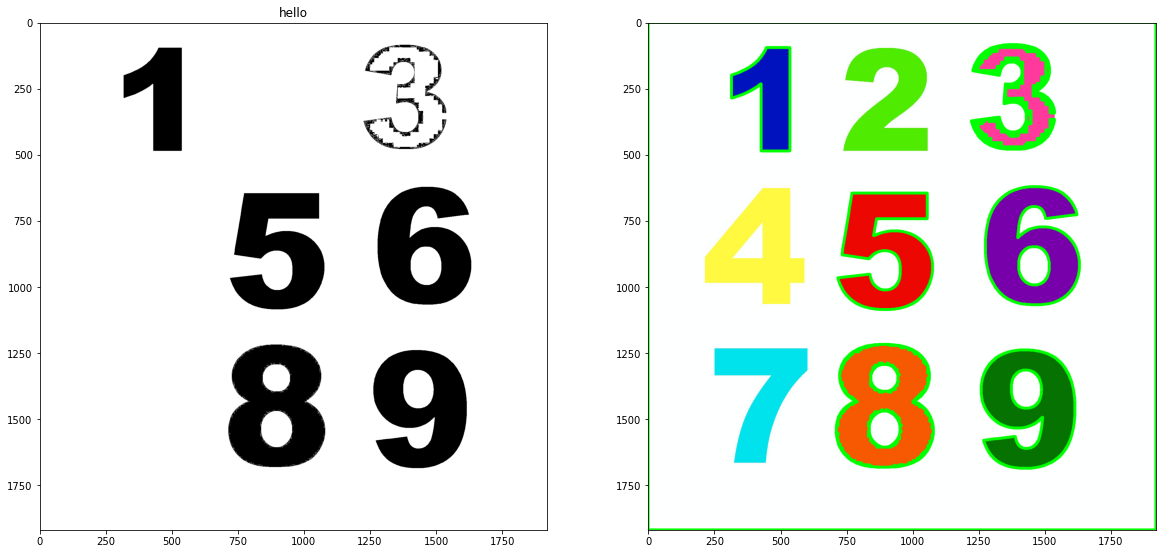

In [0]:
img_0 = cv2.imread('lec04_test1.jpg')
img_0_gray = cv2.cvtColor(img_0, cv2.COLOR_BGR2GRAY)

ret, thr = cv2.threshold(img_0_gray, 127, 255, cv2.THRESH_BINARY)
contours, _ = cv2.findContours(thr, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

cv2.drawContours(img_0, contours, -1, (0, 255, 0), 10)

plt.figure(figsize=(20, 20))
plt.subplot(1, 2, 1), plt.title('hello'), plt.imshow(cv2.cvtColor(thr, cv2.COLOR_BGR2RGB))
plt.subplot(1, 2, 2), plt.imshow(cv2.cvtColor(img_0, cv2.COLOR_BGR2RGB))
plt.show()